# Data Exploration

* Pada data HR yang diberikan, terdapat beberapa kolom seperti `satisfaction_level`, `left`, `last_evaluation`, dll.
* Namun, inti permasalahan pada data ini adalah HR ingin melihat alasan mengapa orang meninggalkan perusahaan `left == 1`.
* Untuk mendapatkan _insight_ dari data tersebut, maka dilakukan EDA(_Exploratory Data Analysis_)

### A. Column description

* Salah satu langkah pertama yang sering dilakukan untuk mendapatkan *insight* adalah dengan melihat statistik pada kolom.
* Berikut diberikan contoh untuk melihat rata-rata dan nilai tengah data pada tiap kolom

In [1]:
import pandas as pd

data_hr = pd.read_csv('data/hr_data.csv', sep=';').rename(columns={'sales':'departments'})

data_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,NaN,0.53,2,157,3,0,1,0,sales,NaN
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,NaN,7,272,4,0,1,0,NaN,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,NaN,2,151,3,0,1,0,support,low
14995,0.37,NaN,2,160,3,0,1,0,support,low
14996,0.37,NaN,2,143,3,0,1,0,support,low
14997,0.11,NaN,6,280,4,0,1,0,support,low


In [2]:
data_hr.mean(numeric_only = True)

satisfaction_level         0.615329
last_evaluation            0.716159
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [3]:
data_hr.median(numeric_only = True)

satisfaction_level         0.65
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

* Lalu, mungkin kita ingin melihat ada berapa orang yang pergi dari perusahaan tersebut dan proporsinya

In [4]:
orang_pergi = len(data_hr[data_hr['left'] == 1])

print('Jumlah pegawai yang meninggalkan perusahaan adalah :', orang_pergi)

Jumlah pegawai yang meninggalkan perusahaan adalah : 3571


In [5]:
total_orang = len(data_hr)
proporsi = orang_pergi / total_orang

print('Proporsi pegawai yang pergi dibanding total pegawai adalah :', proporsi)

Proporsi pegawai yang pergi dibanding total pegawai adalah : 0.2380825388359224


### B. Groupby

* Untuk melihat lebih detail statistik masing-masing kolom yang berkaitan dengan seorang pegawai pergi atau tidak dapat menggunakan `groupby`

In [6]:
df = data_hr.drop(['departments', 'salary'], axis=1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,NaN,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,NaN,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,NaN,2,151,3,0,1,0
14995,0.37,NaN,2,160,3,0,1,0
14996,0.37,NaN,2,143,3,0,1,0
14997,0.11,NaN,6,280,4,0,1,0


In [7]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.439345,0.718435,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
df.groupby("left").median()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.69,0.71,4.0,198.0,3.0,0.0,0.0
1,0.41,0.79,4.0,224.0,4.0,0.0,0.0


* Pada hasil analisis sederhana diatas dapat dilihat beberapa poin yang mungkin cukup menarik:
    * Rata-rata Level kepuasan pegawai yang keluar lebih kecil dibanding pegawai yang bertahan.
    * Rata-rata dari `average_monthly_hours` pegawai yang keluar sedikit lebih banyak dibandingkan dengan pegawai yang stay.
    * Namun, rata-rata `work_accident` pegawai yang keluar lebih sedikit dibanding yang stay.
* Analisis lebih lanjut dapat dilakukan dengan menggunakan `groupby` dengan dua kolom sekaligus.

In [9]:
df.groupby(['left','average_montly_hours']).mean()['satisfaction_level']

left  average_montly_hours
0     96                      0.530000
      97                      0.524286
      98                      0.579565
      99                      0.430000
      100                     0.483158
                                ...   
1     306                     0.107778
      307                     0.223077
      308                     0.102632
      309                     0.114615
      310                     0.153529
Name: satisfaction_level, Length: 356, dtype: float64

In [10]:
df.groupby(["left", "number_project"]).mean()["satisfaction_level"]

left  number_project
0     2                 0.604397
      3                 0.689618
      4                 0.689181
      5                 0.657971
      6                 0.456570
1     2                 0.412664
      3                 0.570435
      4                 0.756146
      5                 0.753823
      6                 0.129665
      7                 0.118255
Name: satisfaction_level, dtype: float64

In [11]:
df.groupby(['left','average_montly_hours']).median()['satisfaction_level']

left  average_montly_hours
0     96                      0.490
      97                      0.425
      98                      0.610
      99                      0.400
      100                     0.540
                              ...  
1     306                     0.110
      307                     0.100
      308                     0.110
      309                     0.100
      310                     0.110
Name: satisfaction_level, Length: 356, dtype: float64

In [12]:
df.groupby(["left", "number_project"]).median()["satisfaction_level"]

left  number_project
0     2                 0.59
      3                 0.70
      4                 0.71
      5                 0.69
      6                 0.39
1     2                 0.41
      3                 0.59
      4                 0.81
      5                 0.81
      6                 0.10
      7                 0.10
Name: satisfaction_level, dtype: float64

* Dapat dilihat secara sekilas bahwa:
    * Pada pegawai yang left maupun tidak, skor kepuasan terbesar berada diantara jumlah proyek 3-5.
    * Jika jumlah proyek terlalu sedikit/terlalu banyak, maka pegawai cenderung tidak puas.

**Latihan**

1. Coba `groupby` kolom `left` dan `time_spend_company` dan hitung rata-rata `satisfaction_level`

In [13]:
df.groupby(["left", "time_spend_company"]).mean()["satisfaction_level"]

left  time_spend_company
0     2                     0.699991
      3                     0.696380
      4                     0.638674
      5                     0.475297
      6                     0.526346
      7                     0.635957
      8                     0.665062
      10                    0.655327
1     2                     0.524694
      3                     0.411466
      4                     0.146719
      5                     0.712802
      6                     0.794330
Name: satisfaction_level, dtype: float64

### C. Condition

* Untuk kebutuhan analisis yang lebih spesifik, kita dapat memfilter tabel sesuai dengan nilai tertentu:

In [14]:
data_pegawai_stay = data_hr[data_hr.columns[0:8]][data_hr['left'] == 0]
data_pegawai_stay.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
2000,0.58,0.74,4,215,3,0,0,0
2001,0.82,0.67,2,202,3,0,0,0
2002,0.45,0.69,5,193,3,0,0,0
2003,0.78,0.82,5,247,3,0,0,0
2004,0.49,0.60,3,214,2,0,0,0


In [15]:
data_pegawai_left = data_hr[data_hr.columns[0:8]][data_hr['left'] == 1]
data_pegawai_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,NaN,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,NaN,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,NaN,2,151,3,0,1,0
14995,0.37,NaN,2,160,3,0,1,0
14996,0.37,NaN,2,143,3,0,1,0
14997,0.11,NaN,6,280,4,0,1,0


In [16]:
data_pegawai_left.groupby(['left', 'number_project']).median()['satisfaction_level']

left  number_project
1     2                 0.41
      3                 0.59
      4                 0.81
      5                 0.81
      6                 0.10
      7                 0.10
Name: satisfaction_level, dtype: float64

In [17]:
data_pegawai_stay.groupby(['left', 'number_project']).median()['satisfaction_level']

left  number_project
0     2                 0.59
      3                 0.70
      4                 0.71
      5                 0.69
      6                 0.39
Name: satisfaction_level, dtype: float64

In [18]:
data_pegawai_left.groupby(['left', 'number_project']).median()['satisfaction_level']

left  number_project
1     2                 0.41
      3                 0.59
      4                 0.81
      5                 0.81
      6                 0.10
      7                 0.10
Name: satisfaction_level, dtype: float64

In [19]:
data_pegawai_stay.groupby(['left', 'number_project']).median()['satisfaction_level']

left  number_project
0     2                 0.59
      3                 0.70
      4                 0.71
      5                 0.69
      6                 0.39
Name: satisfaction_level, dtype: float64

In [20]:
data_hr[data_hr["satisfaction_level"] >= 0.5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
12,0.84,0.92,4,234,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.91,NaN,5,254,5,0,1,0,technical,medium
14986,0.85,NaN,4,247,6,0,1,0,technical,low
14987,0.90,NaN,5,206,4,0,1,0,technical,low
14990,0.89,NaN,5,228,5,1,1,0,support,low


**More Filtering**

In [21]:
data_hr[(data_hr["satisfaction_level"] >= 0.5) & (data_hr["left"] == 0)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2006,0.54,0.37,2,176,2,0,0,0,sales,low
2007,0.99,0.91,5,136,4,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14204,0.64,0.50,4,253,10,0,0,1,management,high
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high


**Get Unique Value**

In [22]:
data_hr["satisfaction_level"].value_counts()

satisfaction_level
0.10    335
0.11    318
0.74    253
0.73    244
0.77    244
       ... 
0.25     33
0.28     31
0.26     30
0.27     30
0.12     30
Name: count, Length: 92, dtype: int64

In [23]:
data_hr["satisfaction_level"].unique()

array([ nan, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.38, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57,
       0.43, 0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24,
       0.91, 0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54,
       0.27, 0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47,
       0.28, 0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64,
       0.5 , 0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16,
       0.65, 0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97,
       0.69, 0.94, 0.96, 0.18, 0.95])

In [24]:
len(data_hr["satisfaction_level"].unique())

93


### D. Pivot Table

* Untuk melihat rata-rata `satisfaction_level` dari departemen dan gaji yang diberikan, dapat dilakukan dengan menggunakan pivot table

In [25]:
import numpy as np

In [26]:
hubungan_divisi_gaji = data_hr.pivot_table(
    values='satisfaction_level', 
    index='departments', 
    columns = 'salary', 
    aggfunc=np.mean
)

/tmp/ipykernel_2939/2784870310.py:1: FutureWarning: The provided callable <function mean at 0x7fefb8131000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  hubungan_divisi_gaji = data_hr.pivot_table(


In [27]:
hubungan_divisi_gaji

salary,high,low,medium
departments,,,
IT,0.638193,0.624184,0.629070
RandD,0.586667,0.622624,0.629972
accounting,0.614054,0.580580,0.588528
hr,0.686364,0.609723,0.586628
management,0.653333,0.618605,0.603439
marketing,0.611299,0.604271,0.643140
product_mng,0.616567,0.625361,0.623405
sales,0.648959,0.608054,0.628319
support,0.658273,0.601174,0.645854


In [28]:
data_hr["salary"].value_counts()

salary
low       7240
medium    6414
high      1235
Name: count, dtype: int64

In [29]:
hubungan_divisi_gaji 

salary,high,low,medium
departments,,,
IT,0.638193,0.624184,0.629070
RandD,0.586667,0.622624,0.629972
accounting,0.614054,0.580580,0.588528
hr,0.686364,0.609723,0.586628
management,0.653333,0.618605,0.603439
marketing,0.611299,0.604271,0.643140
product_mng,0.616567,0.625361,0.623405
sales,0.648959,0.608054,0.628319
support,0.658273,0.601174,0.645854


In [30]:
table = data_hr.pivot_table(
    values='satisfaction_level', 
    index='departments', 
    columns=['salary', 'promotion_last_5years'], 
    aggfunc=np.mean
)

/tmp/ipykernel_2939/1507968266.py:1: FutureWarning: The provided callable <function mean at 0x7fefb8131000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = data_hr.pivot_table(


In [31]:
data_hr['promotion_last_5years'].value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [32]:
table

salary                     high                 low              medium  \
promotion_last_5years         0         1         0         1         0   
departments                                                               
IT                     0.638193       NaN  0.624756  0.460000  0.629430   
RandD                  0.586400  0.600000  0.623231  0.550000  0.628244   
accounting             0.613971  0.615000  0.580933  0.520000  0.587656   
hr                     0.685714  0.700000  0.608669  0.780000  0.586280   
management             0.660611  0.624222  0.617470  0.650000  0.607402   
marketing              0.617083  0.528000  0.600103  0.750909  0.643631   
product_mng            0.616567       NaN  0.625361       NaN  0.623405   
sales                  0.643191  0.772500  0.608085  0.605000  0.624301   
support                0.658273       NaN  0.600545  0.698571  0.645837   
technical              0.626122  0.860000  0.601060  0.521667  0.625536   

salary                           
promotion_last_5years         1  
departments                      
IT                     0.440000  
RandD                  0.655217  
accounting             0.635000  
hr                     0.597273  
management             0.555882  
marketing              0.637037  
product_mng                 NaN  
sales                  0.727647  
support                0.647273  
technical              0.759333

In [33]:
table_promotion_department = data_hr.pivot_table(
    values='satisfaction_level', 
    index='promotion_last_5years',
    columns='departments',
    aggfunc=np.mean
)

table_promotion_department

/tmp/ipykernel_2939/3739023040.py:1: FutureWarning: The provided callable <function mean at 0x7fefb8131000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table_promotion_department = data_hr.pivot_table(


departments,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
promotion_last_5years,,,,,,,,,,
0,0.625637,0.623020,0.586449,0.601447,0.627880,0.618761,0.62042,0.615955,0.620771,0.611318
1,0.453333,0.641481,0.610000,0.635333,0.612029,0.653488,NaN,0.708500,0.667222,0.661071


In [34]:
table = data_hr.pivot_table(
    values="satisfaction_level", 
    index="departments", 
    columns="promotion_last_5years", 
    aggfunc=np.mean
)

table

/tmp/ipykernel_2939/3142607988.py:1: FutureWarning: The provided callable <function mean at 0x7fefb8131000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = data_hr.pivot_table(


promotion_last_5years,0,1
departments,,
IT,0.625637,0.453333
RandD,0.623020,0.641481
accounting,0.586449,0.610000
hr,0.601447,0.635333
management,0.627880,0.612029
marketing,0.618761,0.653488
product_mng,0.620420,NaN
sales,0.615955,0.708500
support,0.620771,0.667222


---
# Basic Visualization

* Dengan menggunakan pandas saja, kita sudah dapat memperoleh *insight* yang cukup banyak.
* Namun, kebanyakan dari *insight* tersebut masih cukup sulit dibaca dan diinterpretasikan.
* Sehingga, kita tetap membutuhkan visualisasi data.
* Untuk visualisasi data, kita akan gunakan library `seaborn`

In [35]:
import seaborn as sns

In [36]:
%matplotlib inline

In [37]:
data_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,NaN,0.53,2,157,3,0,1,0,sales,NaN
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,NaN,7,272,4,0,1,0,NaN,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,NaN,2,151,3,0,1,0,support,low
14995,0.37,NaN,2,160,3,0,1,0,support,low
14996,0.37,NaN,2,143,3,0,1,0,support,low
14997,0.11,NaN,6,280,4,0,1,0,support,low


<Axes: xlabel='satisfaction_level', ylabel='Density'>

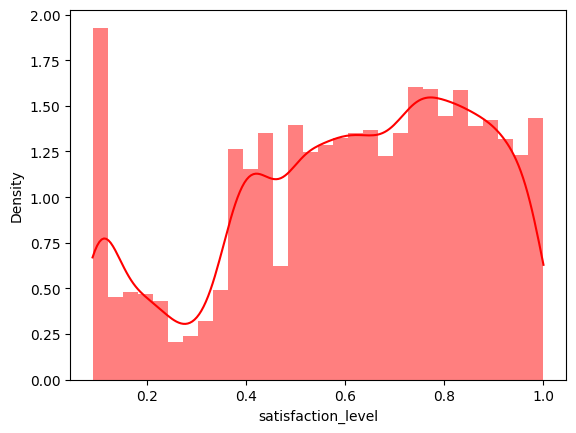

In [38]:
sns.histplot(data_hr["satisfaction_level"], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

* Dapat dilihat bahwa ada lonjakan orang pada `satisfaction_level` sekitar 0.1
* Maka lakukan filtering untuk `data` dengen kepuasan rendah

In [39]:
kepuasan_rendah = data_hr[data_hr['satisfaction_level'] <= 0.2]

kepuasan_rendah

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
2,0.11,NaN,7,272,4,0,1,0,NaN,medium
6,0.10,0.77,6,247,4,0,1,0,sales,low
11,0.11,0.81,6,305,4,0,1,0,sales,low
20,0.11,0.83,6,282,4,0,1,0,sales,low
22,0.09,0.95,6,304,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14972,0.11,NaN,6,310,4,0,1,0,accounting,medium
14975,0.10,NaN,7,310,4,0,1,0,hr,medium
14979,0.09,NaN,6,296,4,0,1,0,technical,medium
14991,0.09,NaN,6,257,4,0,1,0,support,low


* Dari sini kita bisa mengeksplorasi data lebih lanjut lagi
* Pada plot berikut kita ingin melihat perbandingan antara orang yang left dan tidak

<Axes: xlabel='left', ylabel='count'>

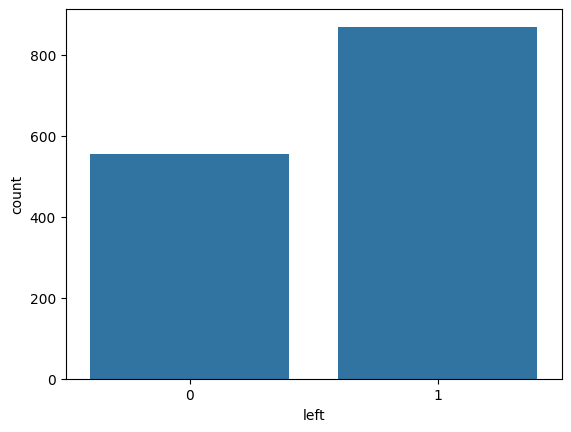

In [40]:
sns.countplot(x='left', data=kepuasan_rendah)

* Kita juga bisa melihat perbandingan gaji antara pegawai yang keluar atau tidak

<Axes: xlabel='salary', ylabel='count'>

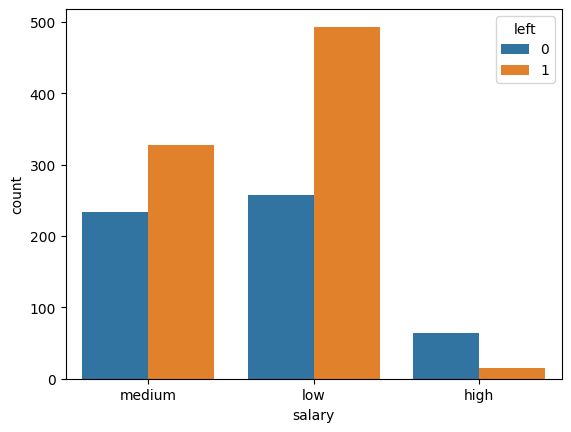

In [41]:
sns.countplot(x='salary', data=kepuasan_rendah, hue='left')

<Axes: xlabel='salary', ylabel='average_montly_hours'>

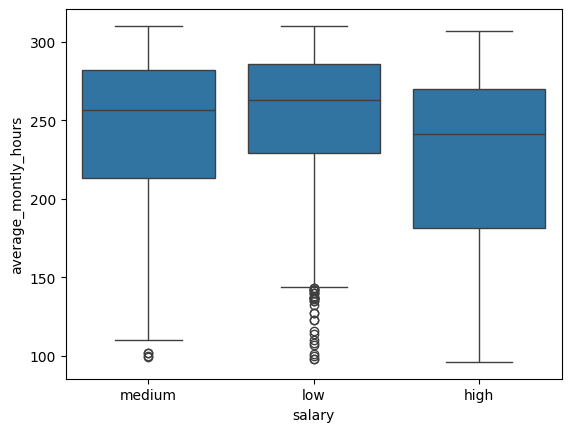

In [42]:
sns.boxplot(x='salary', y='average_montly_hours', data=kepuasan_rendah)

**Cari data outliers**
* Dengan ketentuan salary low dan memiliki `average_montly_hours` kurang dari 150

In [43]:
salary_data = 'low'
mothly_work_hour = 150

outliers = kepuasan_rendah[kepuasan_rendah['salary'] == salary_data]
outliers[outliers['average_montly_hours'] < mothly_work_hour]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
985,0.11,0.55,2,137,3,1,1,0,RandD,low
1415,0.20,0.90,6,138,3,0,1,0,technical,low
1564,0.12,0.80,5,136,2,0,1,0,technical,low
1906,0.20,0.50,5,135,6,0,1,0,RandD,low
2188,0.18,0.80,2,110,5,0,0,0,support,low
2360,0.19,0.63,4,142,6,0,0,0,RandD,low
2748,0.20,0.74,6,148,4,0,0,0,marketing,low
3834,0.19,0.50,6,143,5,1,0,0,sales,low
3870,0.20,0.93,4,101,5,0,0,0,support,low
4146,0.18,0.81,5,140,4,0,0,0,sales,low


In [44]:
len(outliers[outliers['average_montly_hours'] < mothly_work_hour])

44